In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# Visualización

## Seaborn objects y la gramática de gráficos

Introducidos a finales de 2022, el nuevo sistema está basado el paradigma "Gramática de Gráficos" que utilizan otros paquetes como `ggplot2` de R.

No necesitamos recordar una docena de métodos para hacer gráficos, todo gráfico se hace mediante una única clase `Plot()`.n

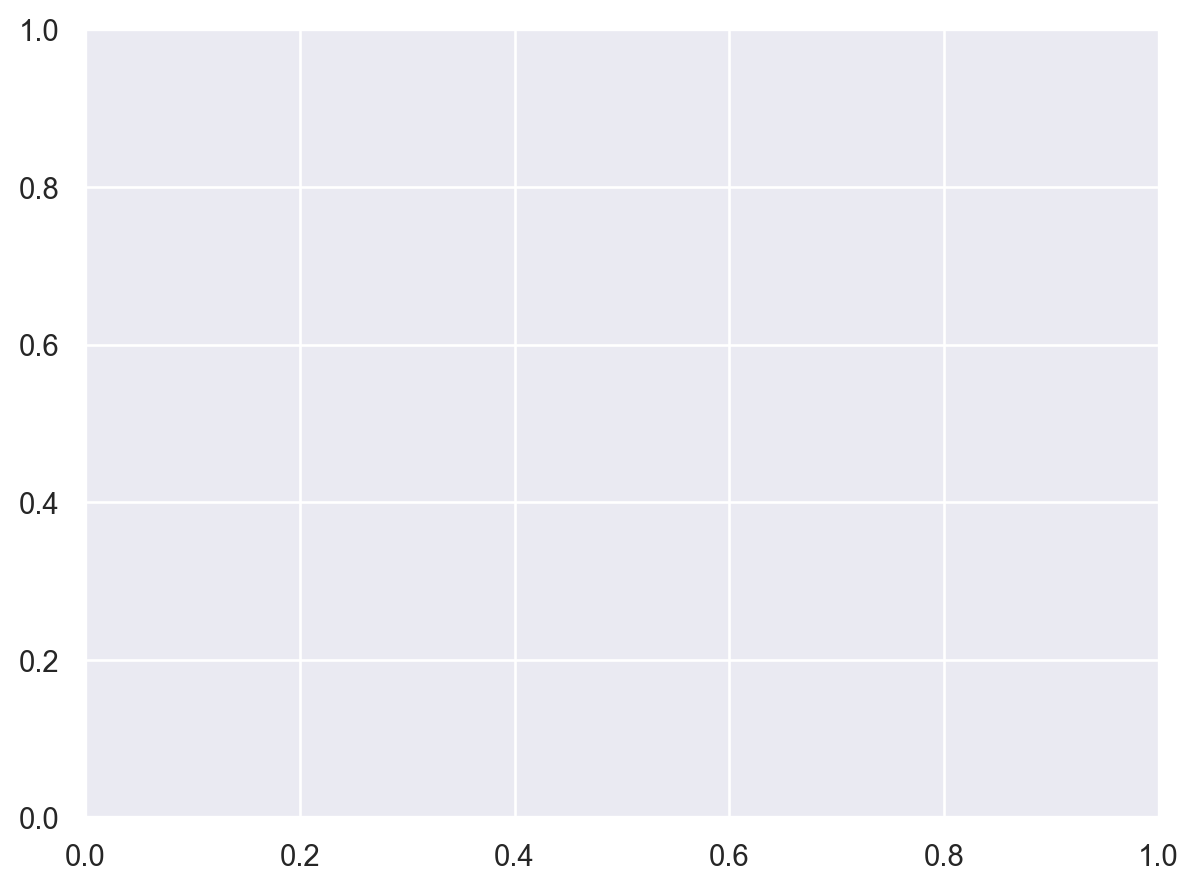

In [3]:
# Comenzamos con un gráfico vacío
so.Plot()

In [6]:
# Agregamos un conjunto de datos, por ejemplo un dataset con el índice Dow Jones de las bolsas de Estados Unidos.
dowjones = sns.load_dataset("dowjones")
dowjones.head()


,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


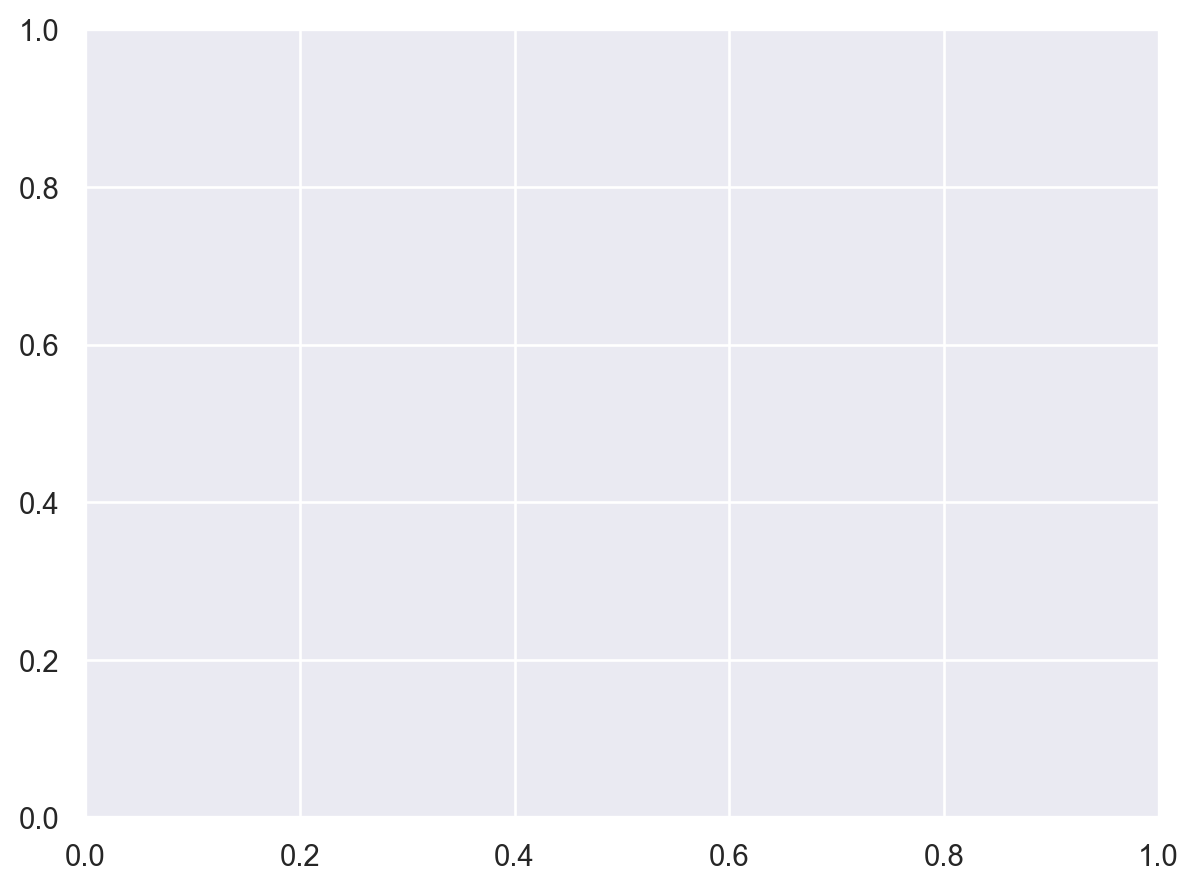

In [7]:
so.Plot(data = dowjones)

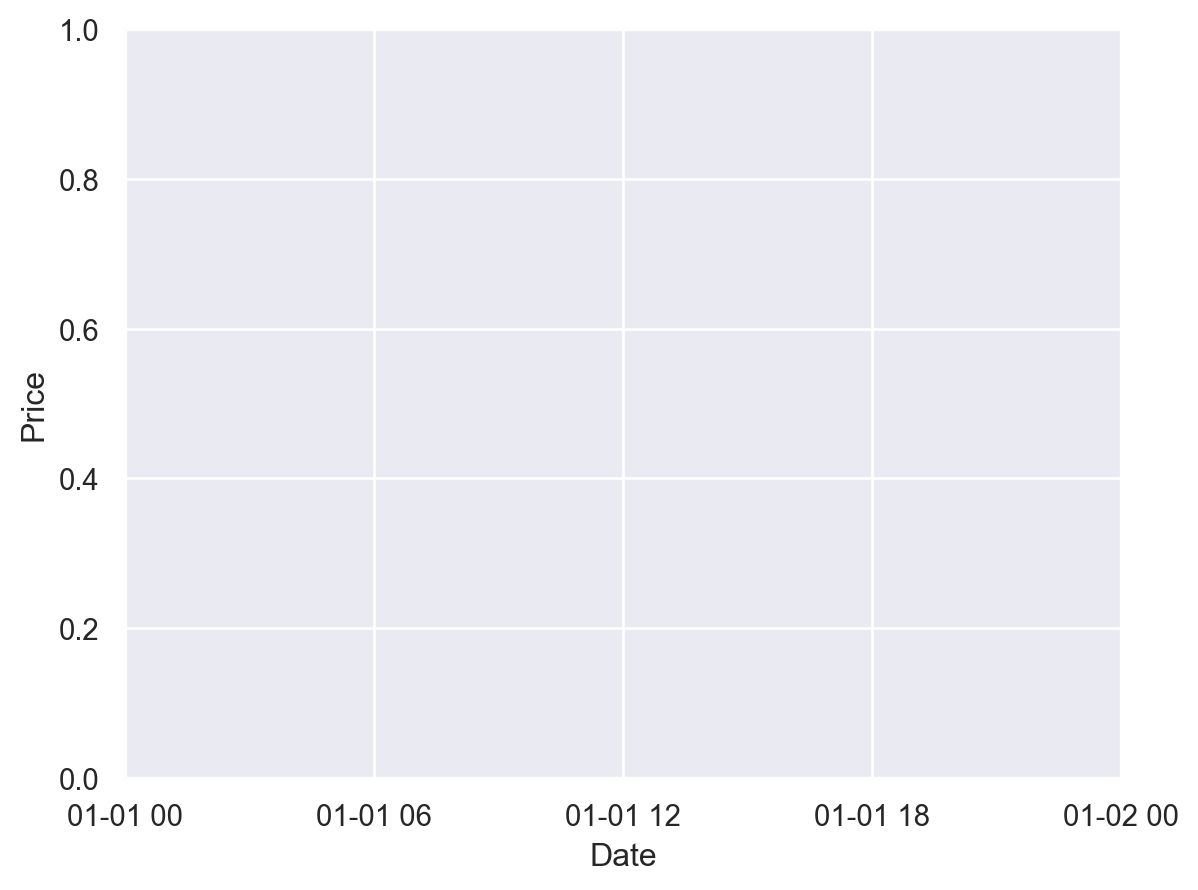

In [9]:
# Mapeamos la fecha al eje X y el precio al eje Y
so.Plot(data = dowjones, x = "Date", y = "Price")

### Gráfico de funciones

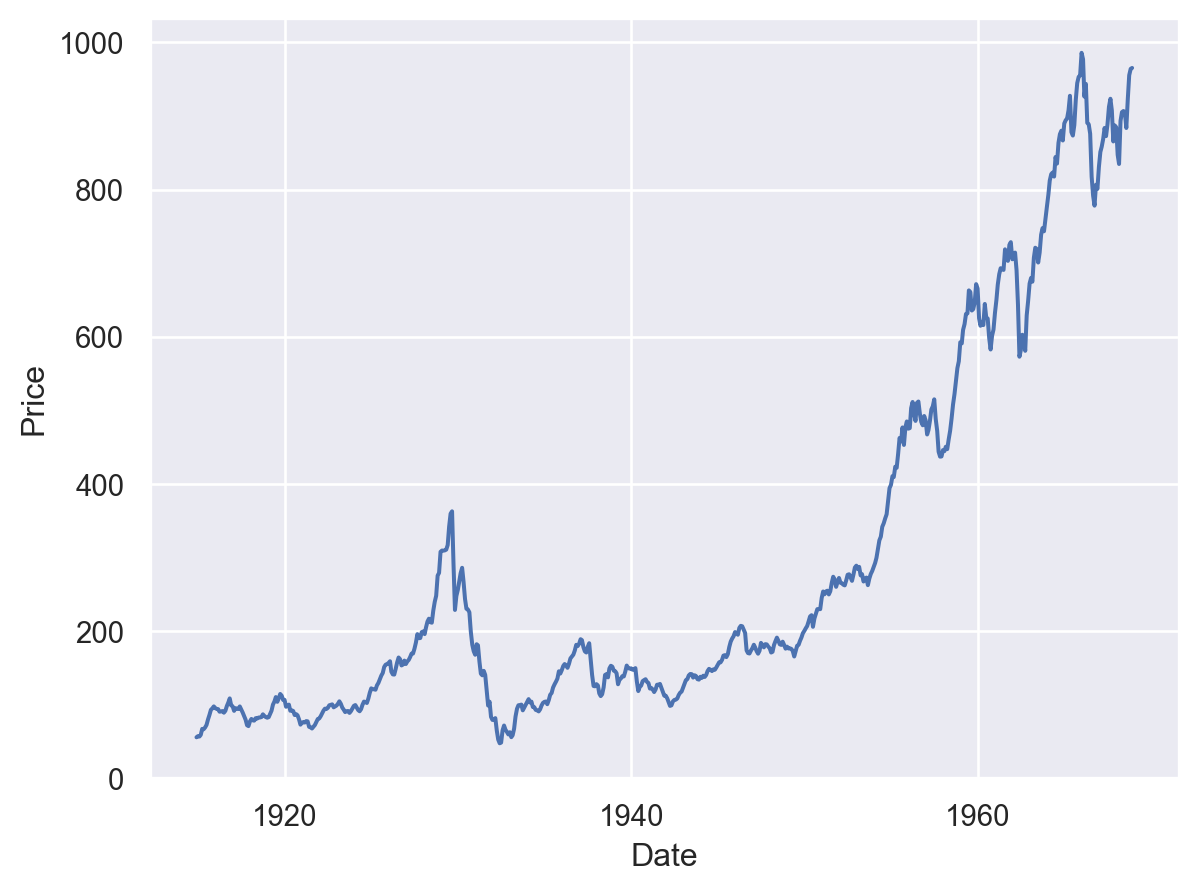

In [11]:
# Finalmente agregamos una marca, en este caso una curva.
# Usamos paréntesis para poder separar el comando en varias líneas y facilitar la lectura.
(
    so.Plot(data = dowjones, x = "Date", y = "Price")
    .add(so.Line())
)

### Gráfico de dispersión (scatter plot)

In [13]:
tips = sns.load_dataset("tips")
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


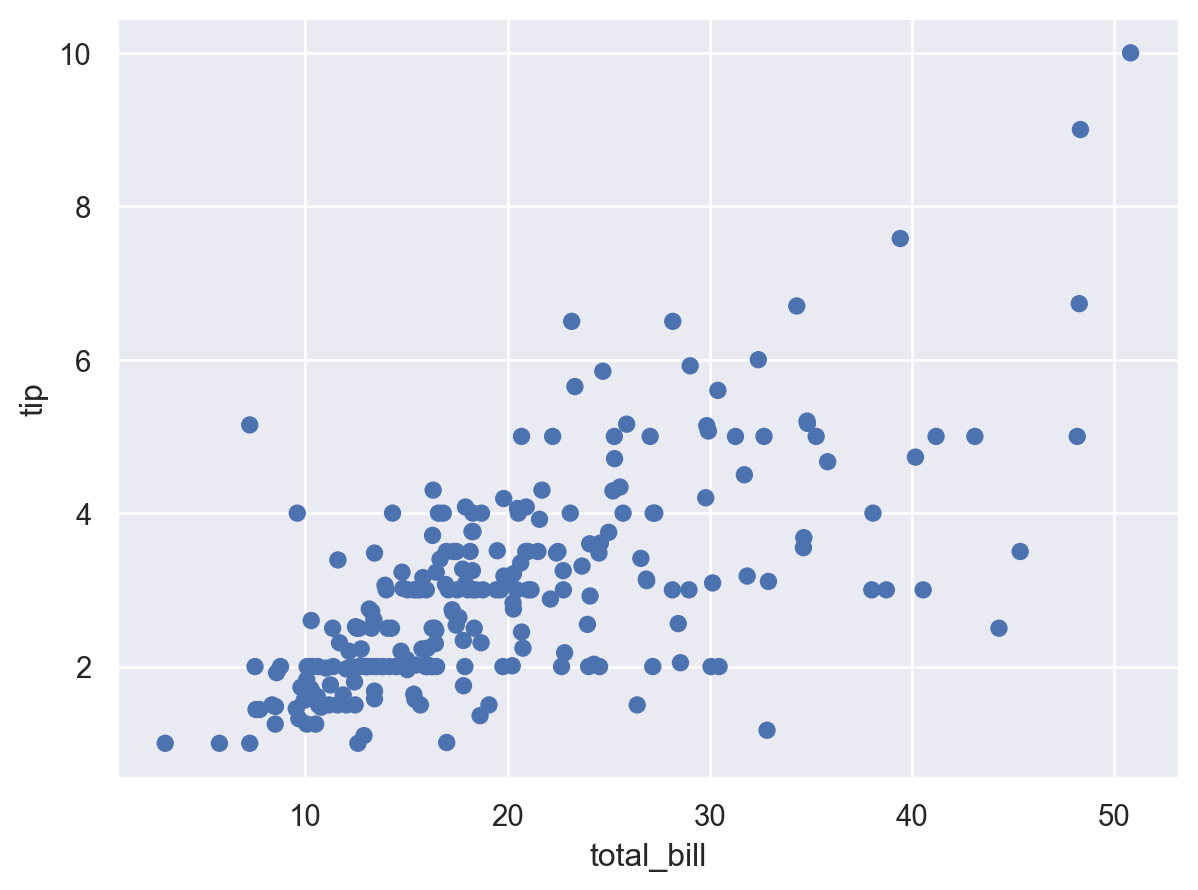

In [23]:
# Para usar puntos en vez de curvas, cambiamos la marca a Dot().
(
    so.Plot(data = tips, x = "total_bill", y = "tip")
    .add(so.Dot())
)

### Gráfico de curvas y puntos?

In [17]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


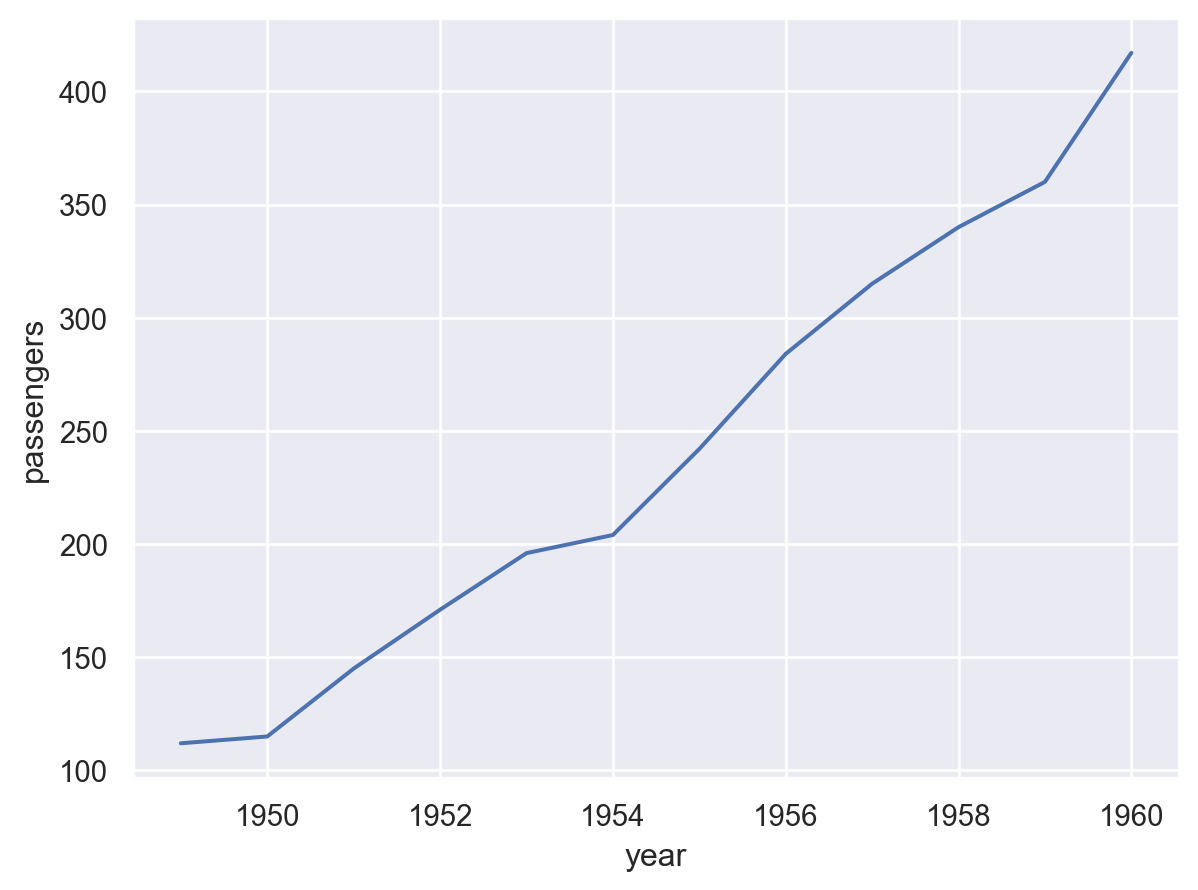

In [20]:
# Graficamos la curva cantidad de pasajeros en enero de cada año
(
    so.Plot(data = flights[flights.month == "Jan"], x = "year", y = "passengers")
    .add(so.Line())
)

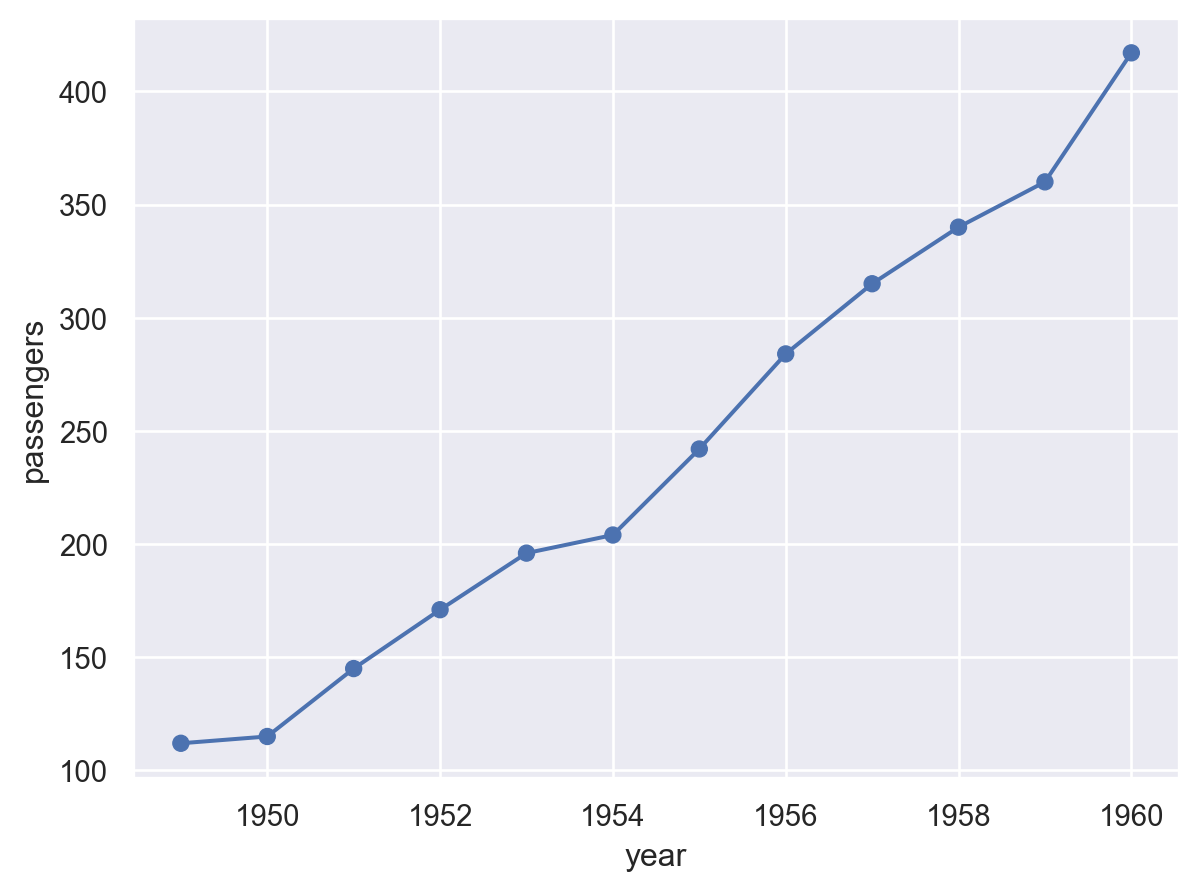

In [21]:
# Si queremos agregar los puntos correspondientes a cada dato...
(
    so.Plot(data = flights[flights.month == "Jan"], x = "year", y = "passengers")
    .add(so.Line())
    .add(so.Dot())
)

Podemos también fácilmente agregar datos (aggregate = agregar, juntar, resumir, ...)

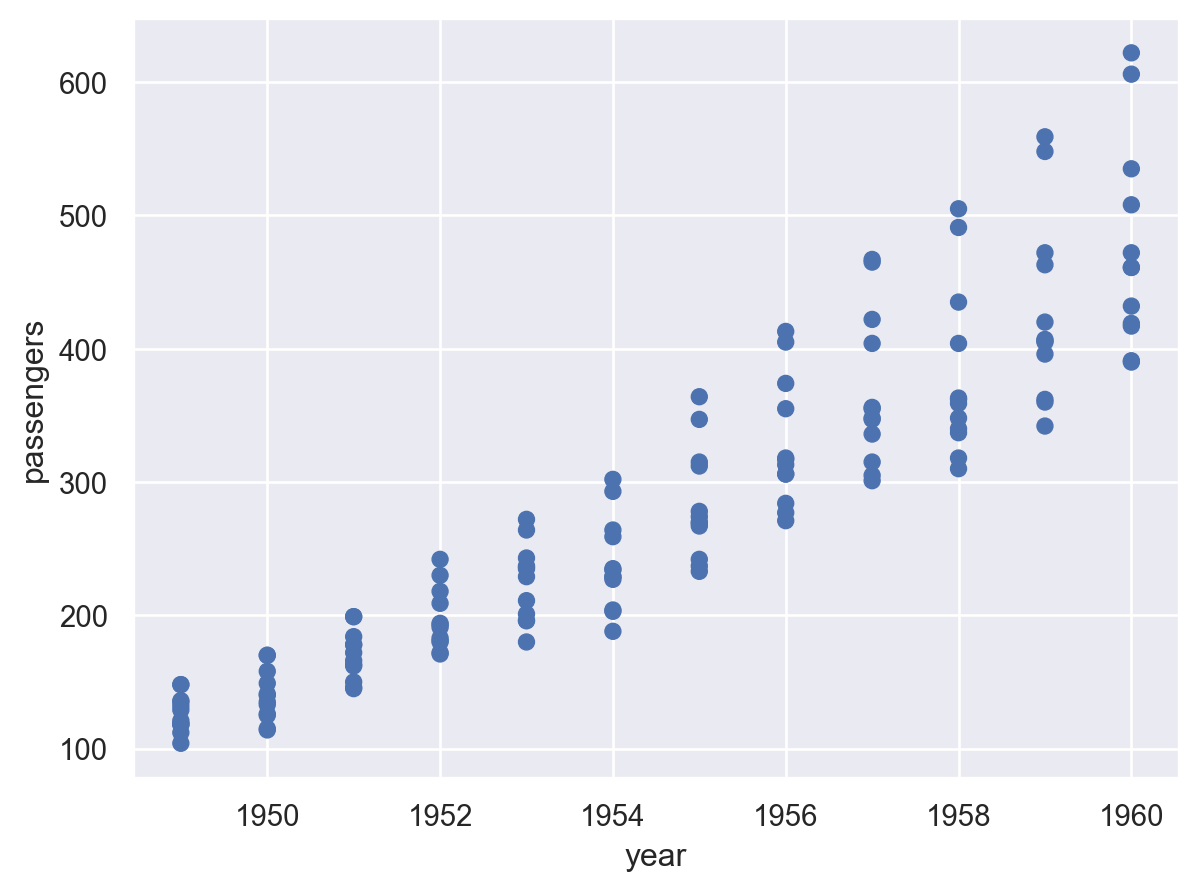

In [25]:
# Queremos considerar todos los meses. 
# Si sacamos el filtro...

(
    so.Plot(data = flights, x = "year", y = "passengers")
    .add(so.Dot())
)

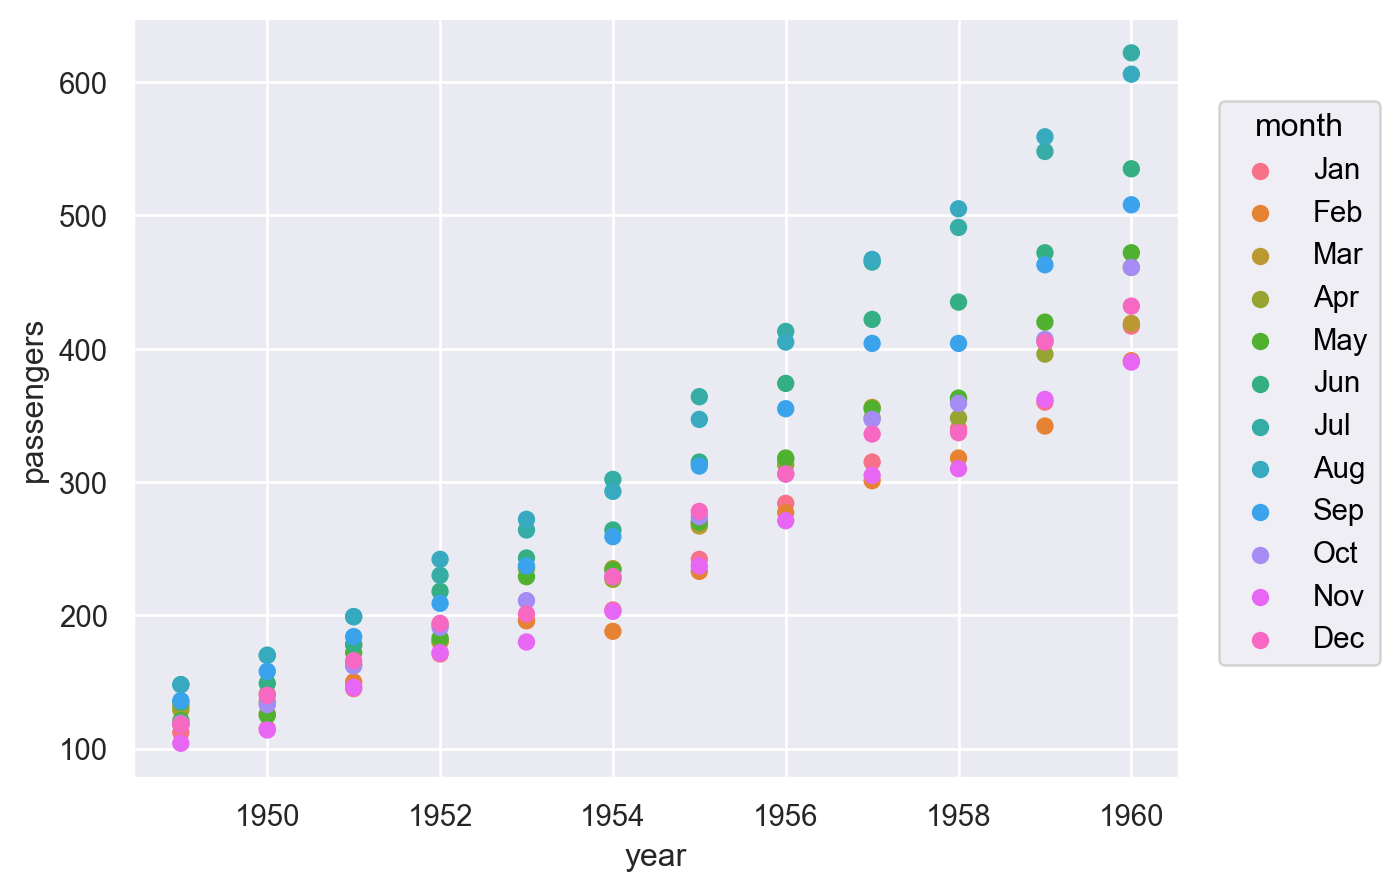

In [26]:
# Opción 1: utilizamos otro canal para codificar el mes
(
    so.Plot(data = flights, x = "year", y = "passengers", color = "month")
    .add(so.Dot())
)

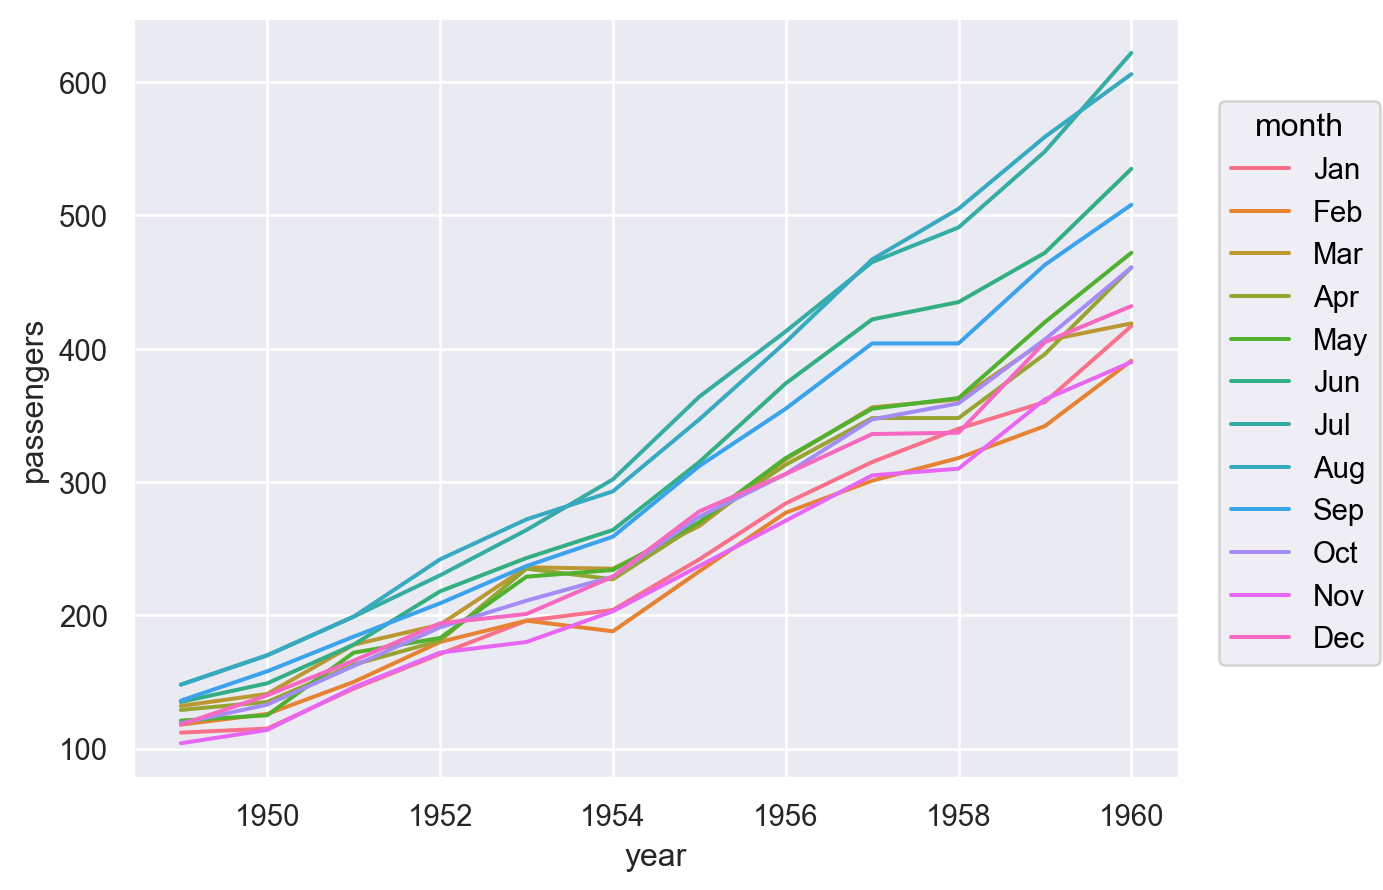

In [27]:
# Y si usamos líneas?
(
    so.Plot(data = flights, x = "year", y = "passengers", color = "month")
    .add(so.Line())
)

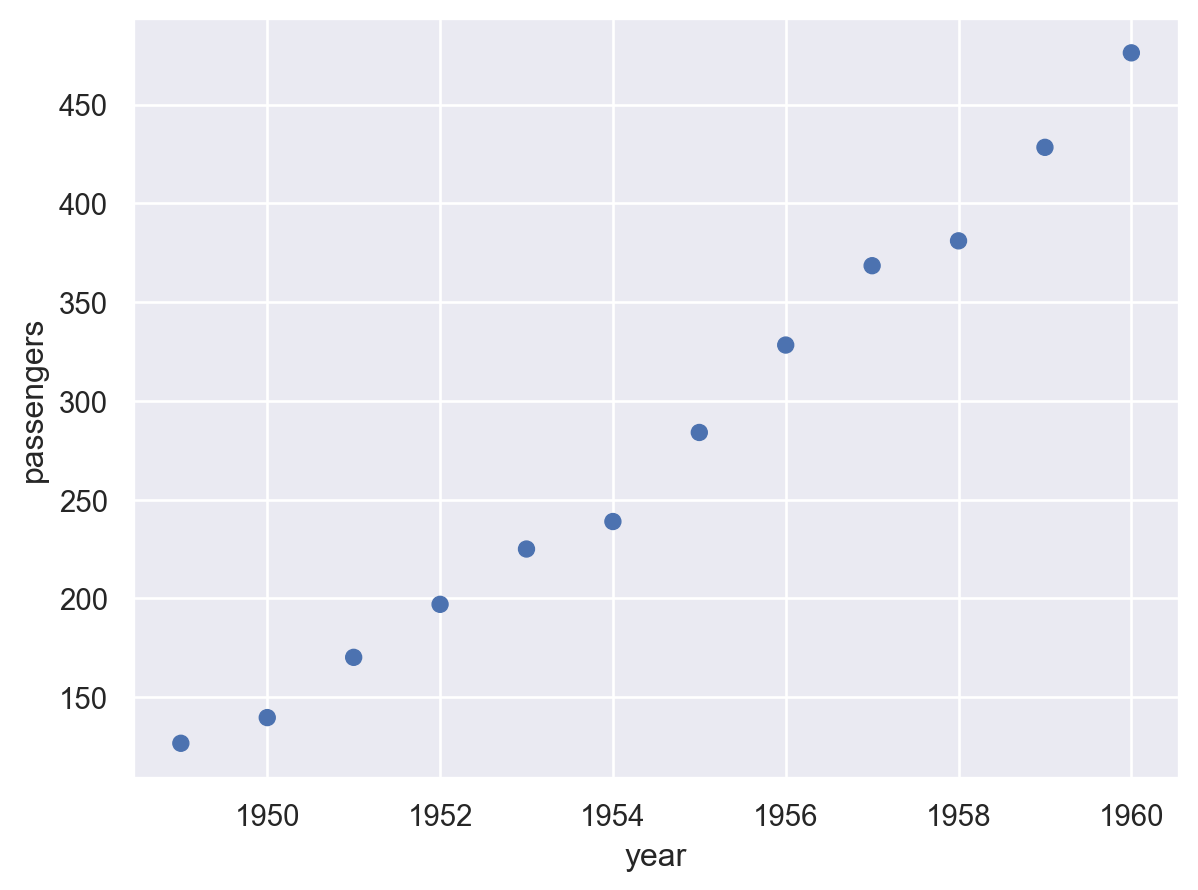

In [30]:
# Opción 2: agregamos los datos por mes
# Podemos calcularlos previamente utilizando lo que vimos en la práctica 2 (groupby(), sum(), ...)
# o usamos una función para agregar los datos.
(
    so.Plot(data = flights, x = "year", y = "passengers")
    .add(so.Dot(), so.Agg())
)

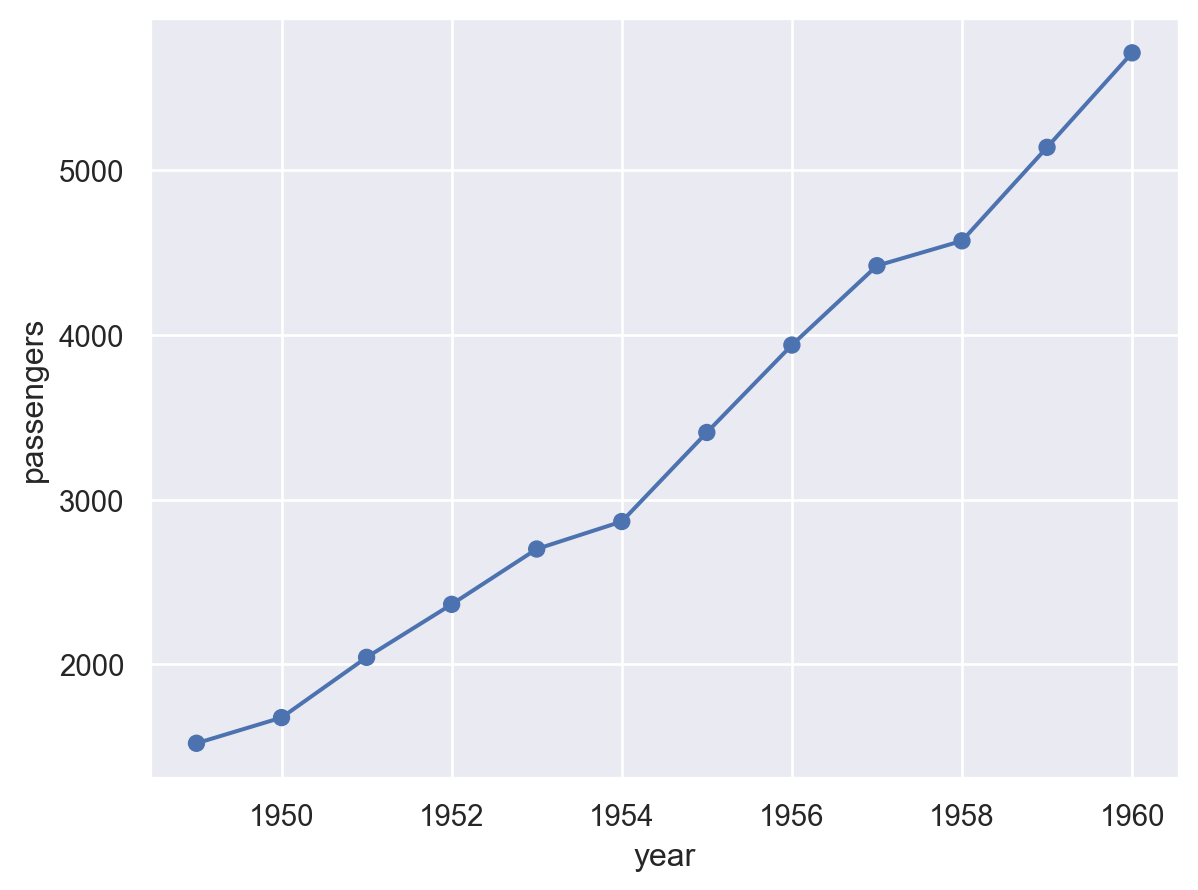

In [31]:
# Qué valores está graficando? Es la suma??
# Podemos indicar cualquier función de Pandas.Series para agregar los datos
(
    so.Plot(data = flights, x = "year", y = "passengers")
    .add(so.Dot(), so.Agg("sum"))
    .add(so.Line(), so.Agg("sum"))
)

## Mapeo y asignación por capas

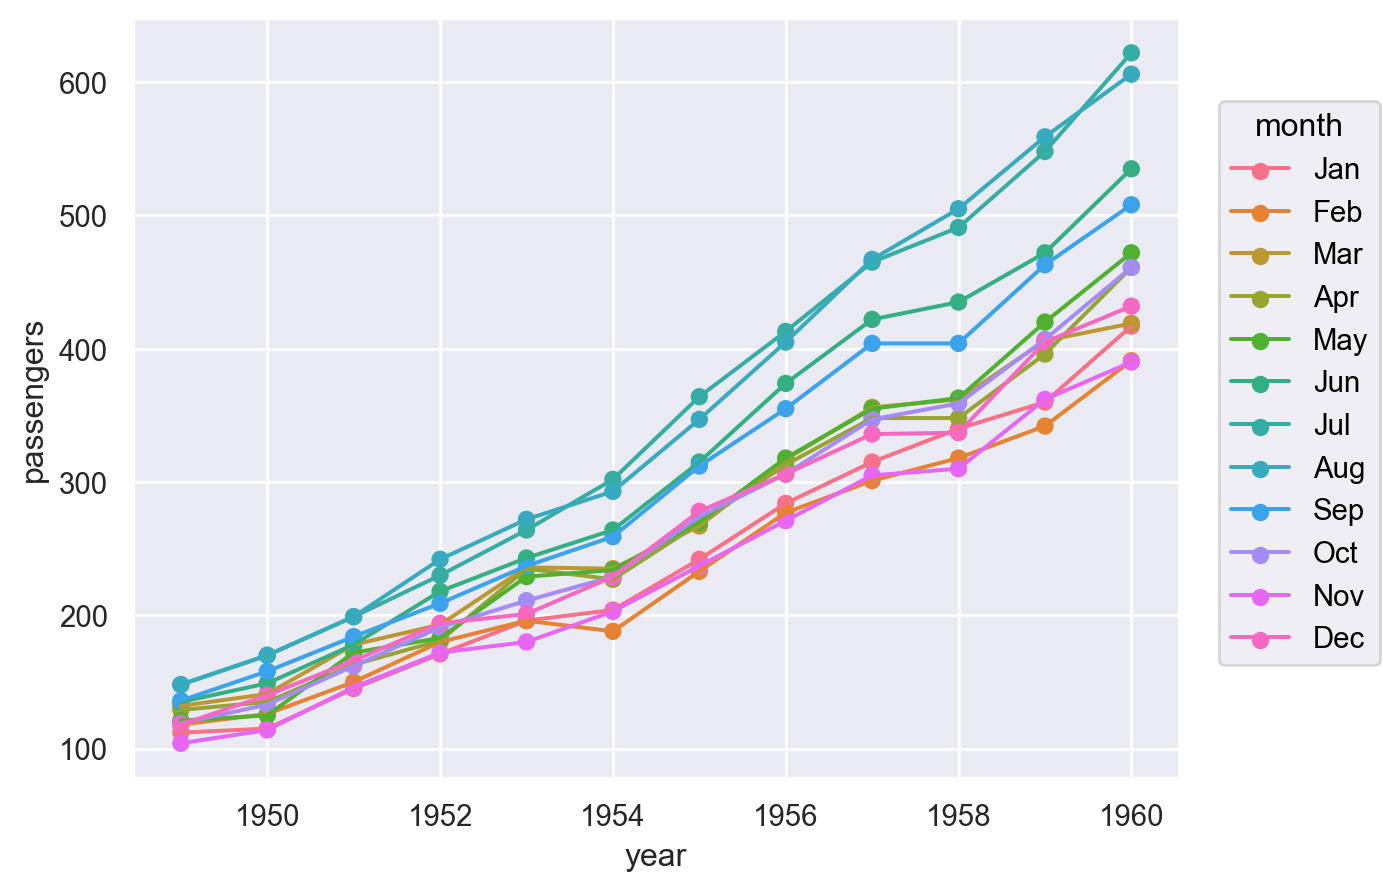

In [33]:
# Podemos asignar una codificación al definir el Plot() y esa codificación para a todas las capas.
(
    so.Plot(data = flights, x = "year", y = "passengers", color = "month")
    .add(so.Line())
    .add(so.Dot())
)

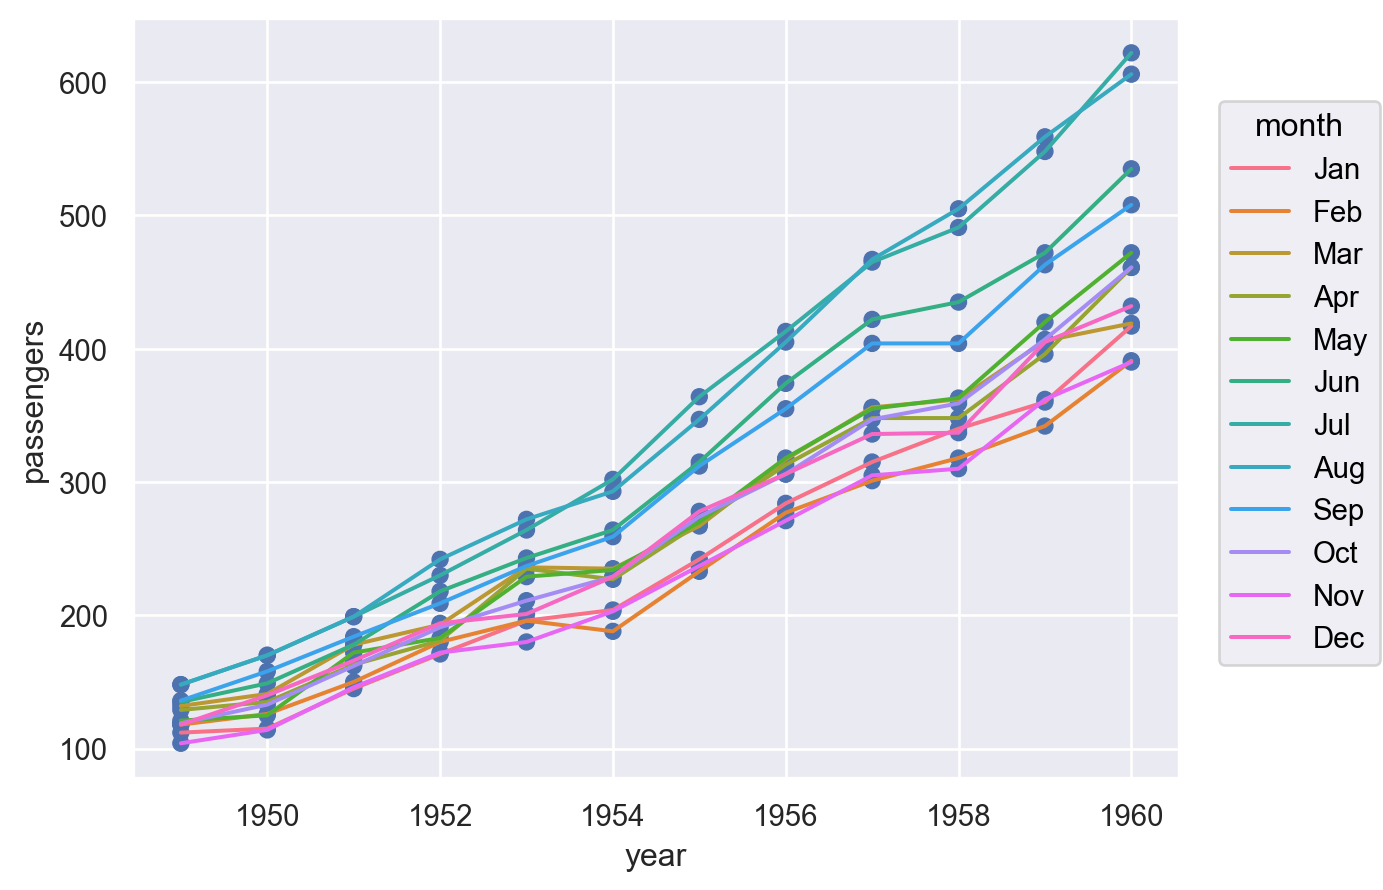

In [36]:
# O podemos asignar una codificación al agregar una marca y esa codificación se aplica solo en esa capa.
(
    so.Plot(data = flights, x = "year", y = "passengers")
    .add(so.Line(), color = "month")
    .add(so.Dot())
)

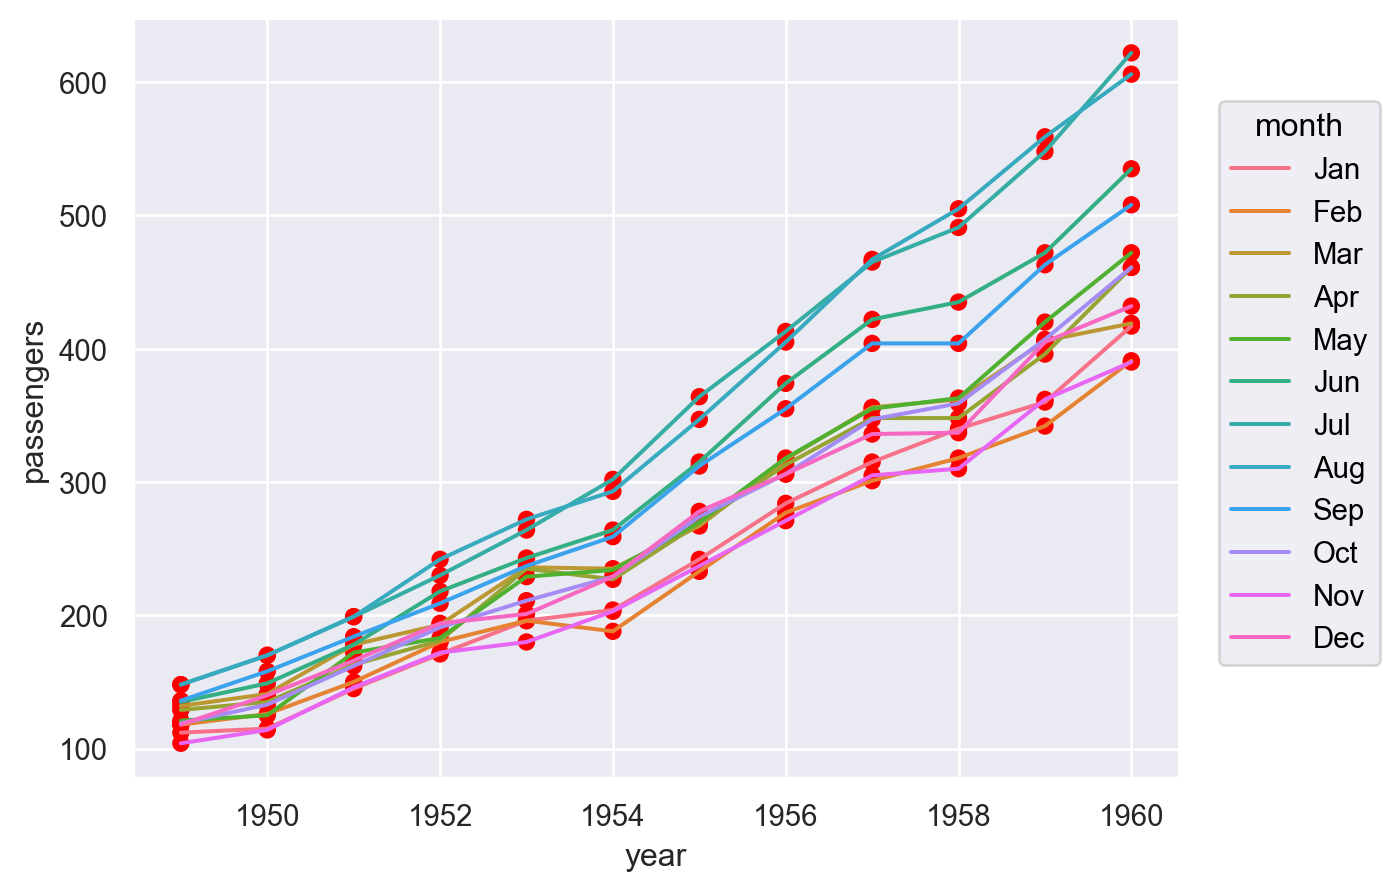

In [39]:
# Si asignamos un pámatetro a la marca Dot() u otra marca, no estamos codificando datos sino que asignamos el valor directamente.
(
    so.Plot(data = flights, x = "year", y = "passengers")
    .add(so.Line(), color = "month")
    .add(so.Dot(color = "red"))
)

**Ejercicio** ¿Que pasa si hacemos `.add(so.Dot(color = "month"))`?

¿Y si hacemos `so.Plot(data = flights, x = "year", y = "passengers", color = "red")`?

## Gráficos de barras

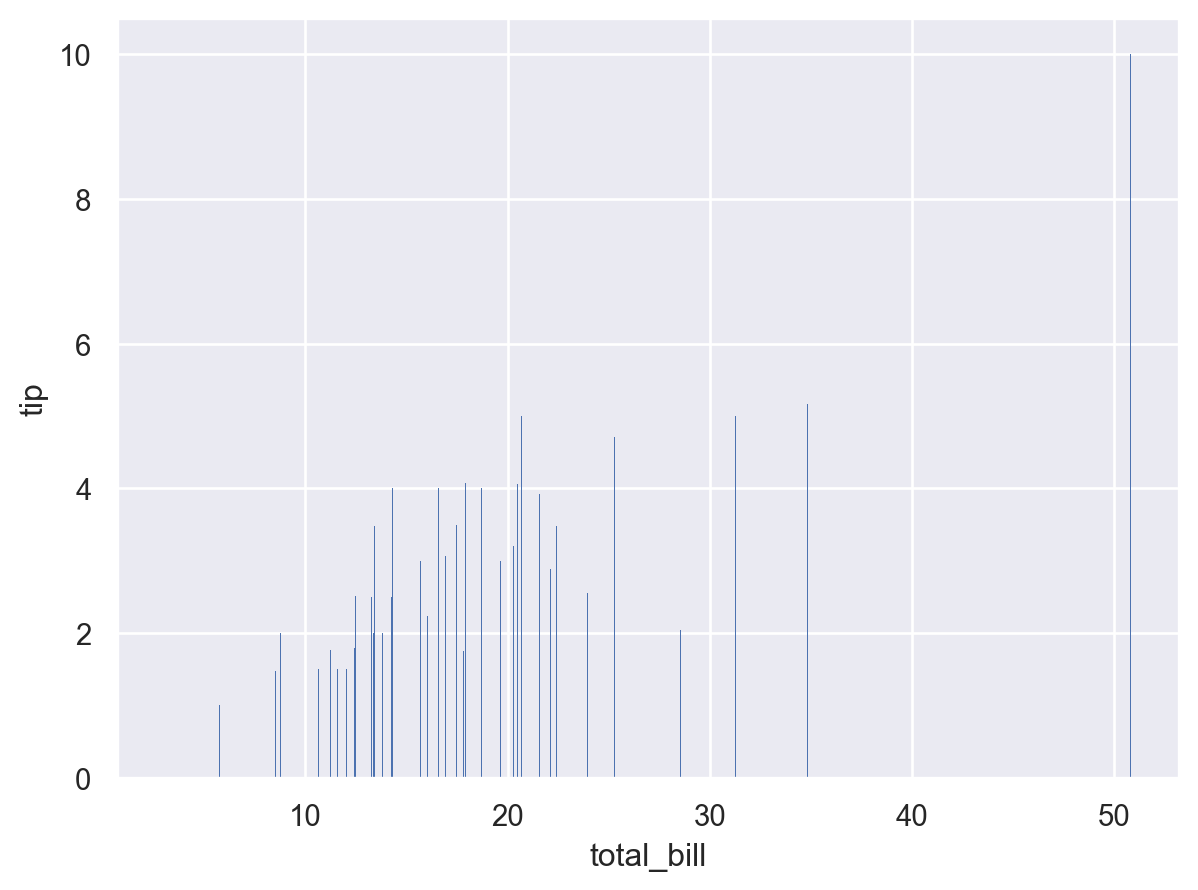

In [41]:
# Qué hace la marca "barras" (Bars)? 
tips = sns.load_dataset("tips")
(
    so.Plot(tips, "total_bill", "tip")
    .add(so.Bar())
)

In [42]:
# En el anterior caso no es una buena visualización.
# Probamos un ejemplo más sencillo

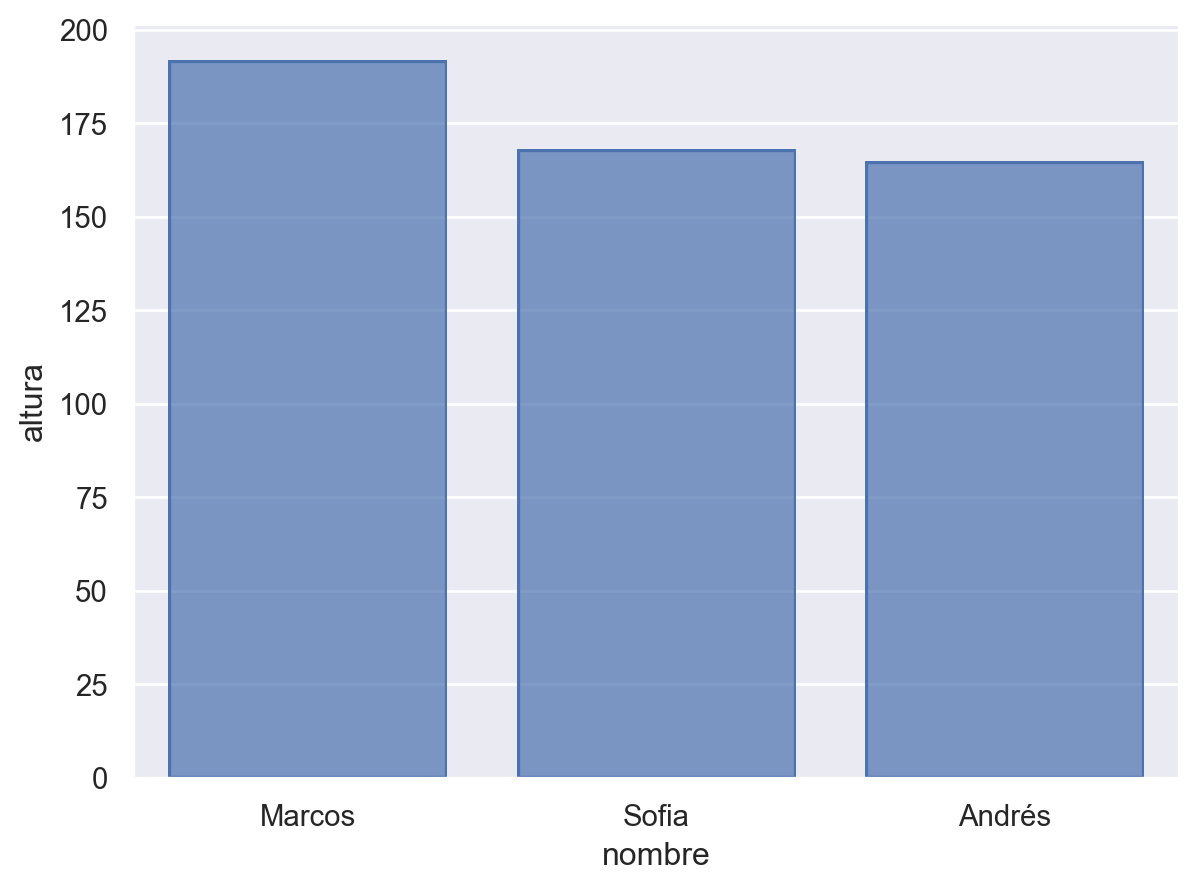

In [43]:
personas = pd.DataFrame({'nombre':['Marcos', 'Sofia', 'Andrés'], 'altura':[192, 168,165]})
(
    so.Plot(personas, "nombre", "altura")
    .add(so.Bar())
)

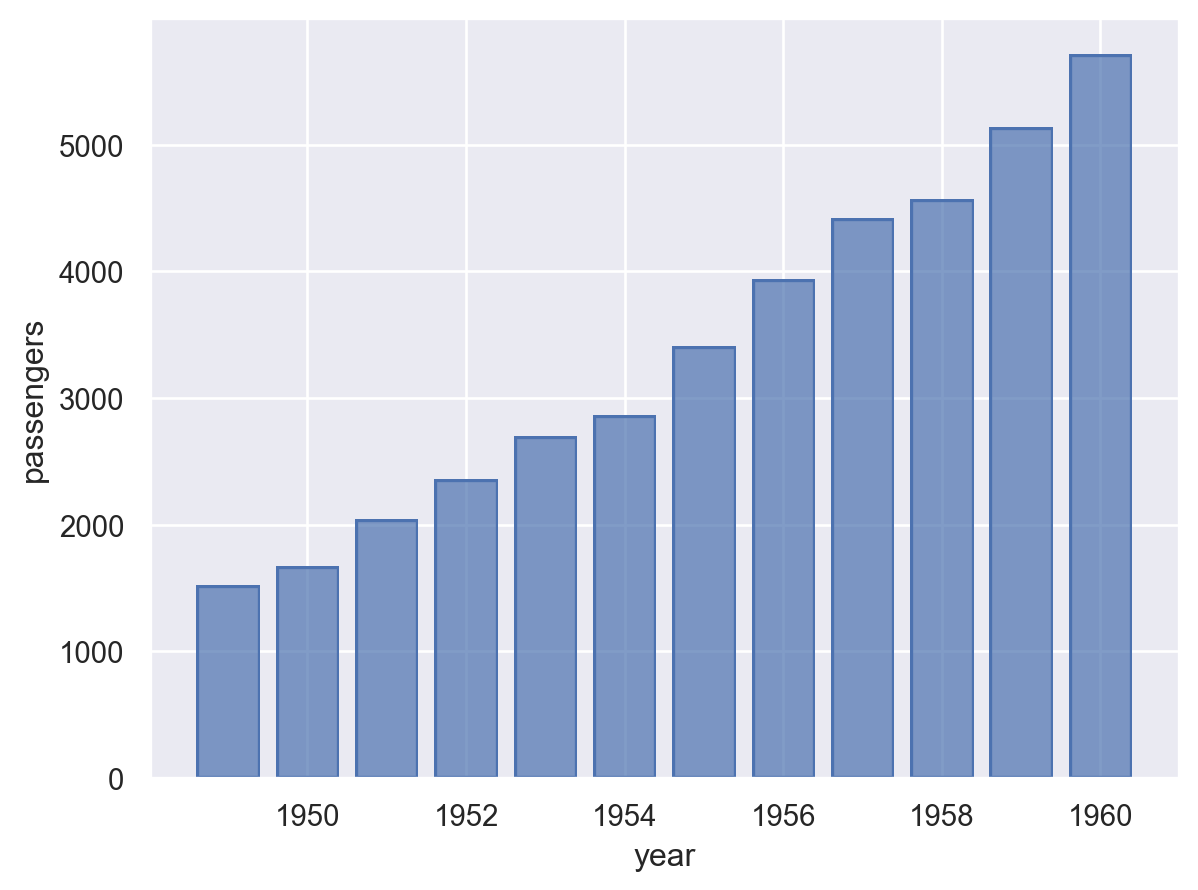

In [44]:
# La variable x puede también corresponder a valores numéricos discretos.
# Graficamos la cantidad total de vuelos por año.
(
    so.Plot(data = flights, x = "year", y = "passengers")
    .add(so.Bar(), so.Agg("sum"))
)

## Histogramas
El último gráfico de barras podemos pensarlo como un histograma, vemos la cantidad de pasajero en función del año.
En ese caso las cantidades por mes ya estaban calculadas y solo las sumamos.

Cuando tenemos todos los datos individuales, podemos agregarlos para hacer un gráfico de barras usando el método `hist`.

In [46]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


#### Histograma de una variable categórica

Tenemos una base de datos con información de píngüinos y queremos saber cuántos pingüinos hay en cada isla.

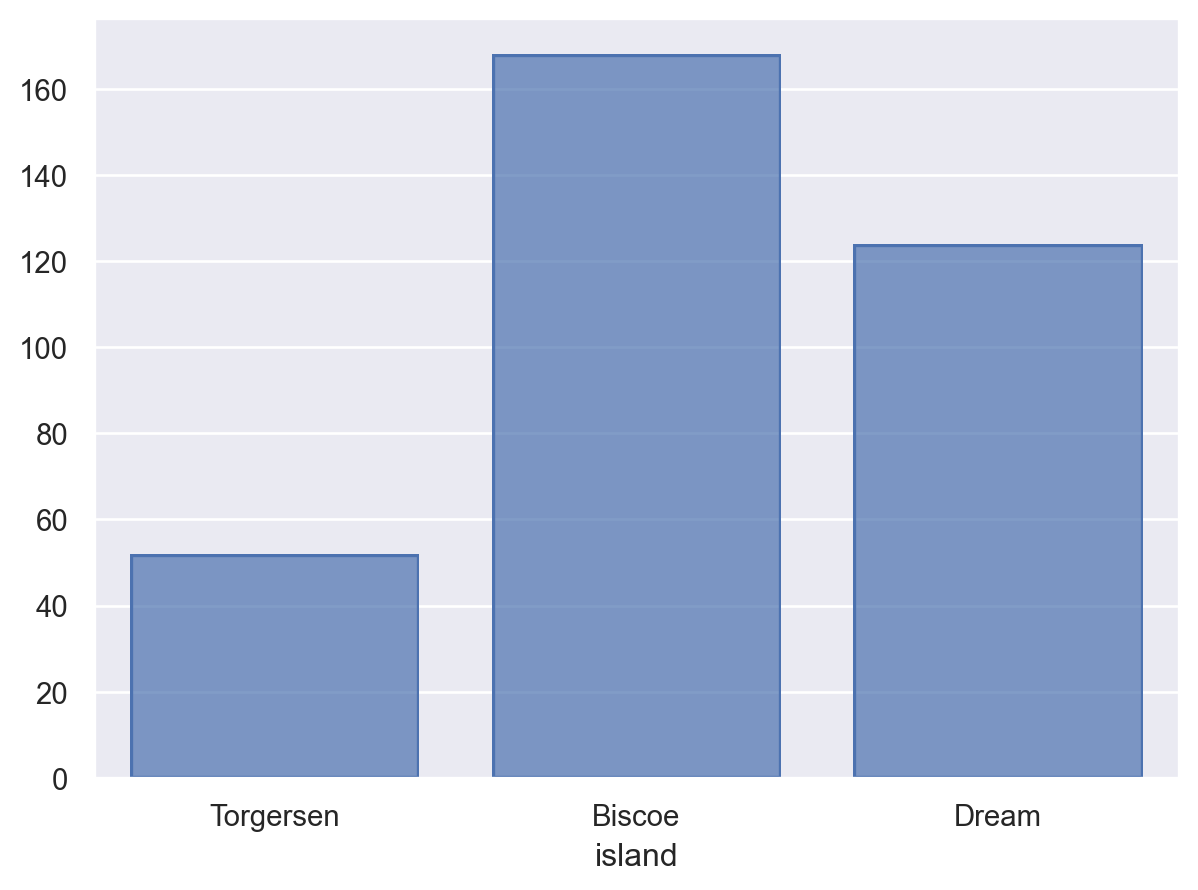

In [49]:
# Por qué no especificamos una variable y?
(
    so.Plot(data = penguins, x = "island")
    .add(so.Bar(), so.Hist())
)

#### Histograma de una variable numérica

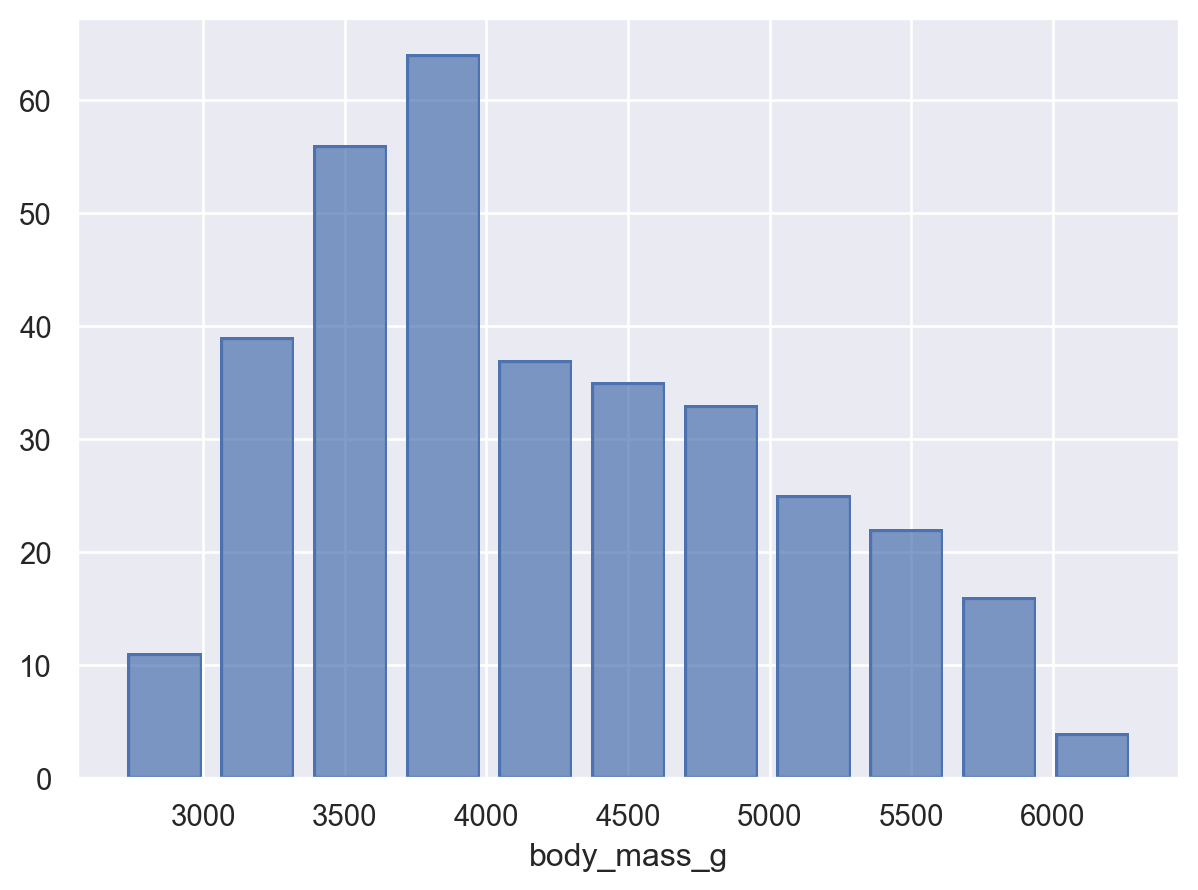

In [52]:
# Queremos ver cuántos pingüinos hay en distintos rangos de peso.
(
    so.Plot(data = penguins, x = "body_mass_g")
    .add(so.Bar(), so.Hist())
)

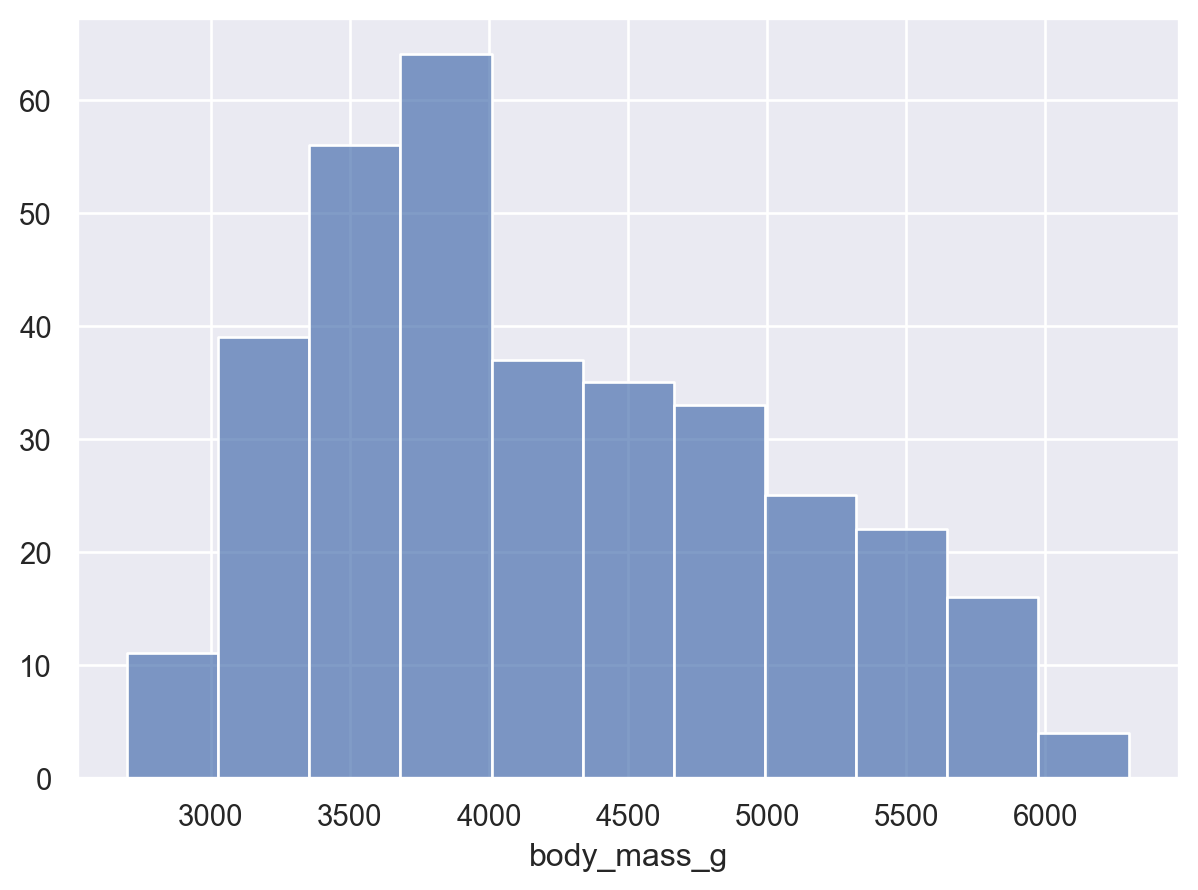

In [54]:
# Para histogramas de una variable continua es más común que no haya tanto espacio entre las barras.
# Para eso usamos Bars en lugar de Bar

(
    so.Plot(data = penguins, x = "body_mass_g")
    .add(so.Bars(), so.Hist())
)

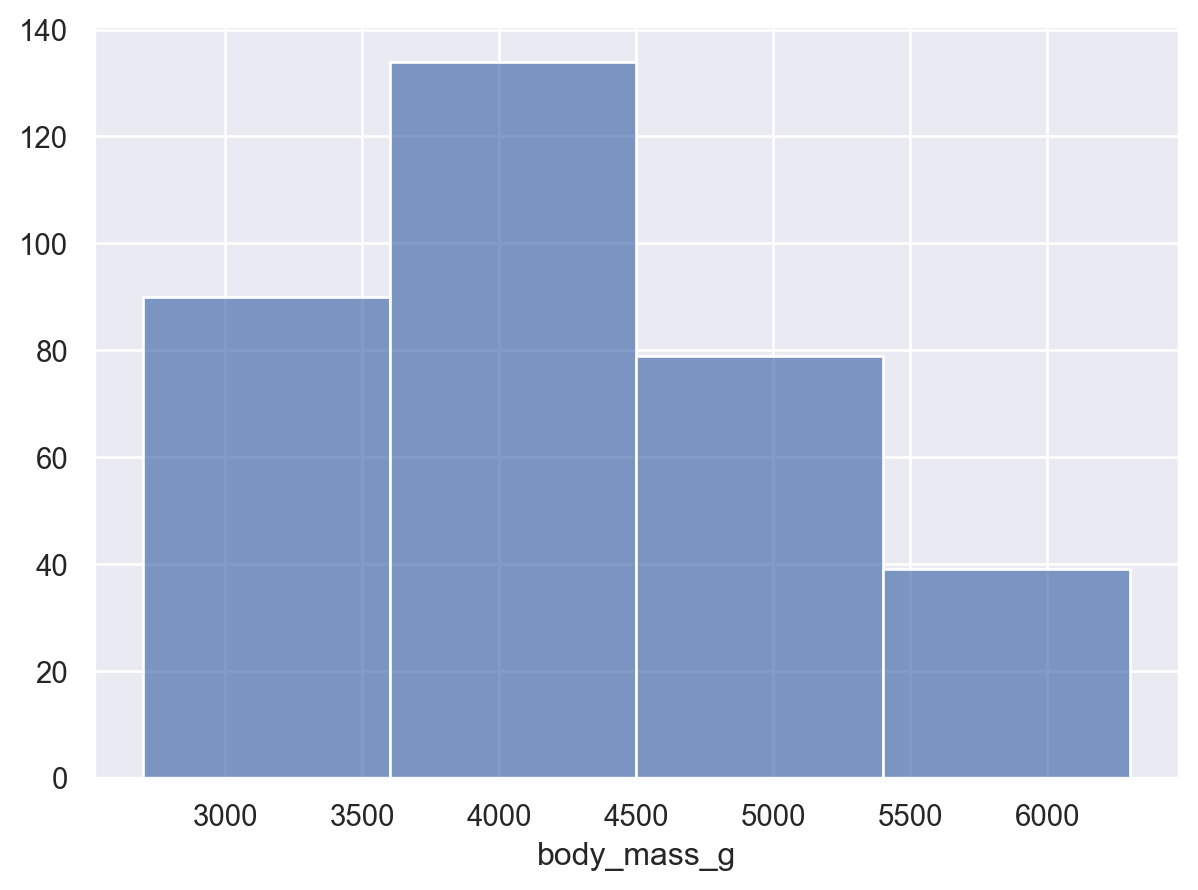

In [55]:
# Podemos cambiar la cantidad de intervalos
(
    so.Plot(data = penguins, x = "body_mass_g")
    .add(so.Bars(), so.Hist(bins = 4))
)

## Box plot
En Seaborn objects no tenemos la opción de realizar box plots. Podemos hacerlos utilizando `seaborn.boxplot()`.

<Axes: xlabel='body_mass_g'>

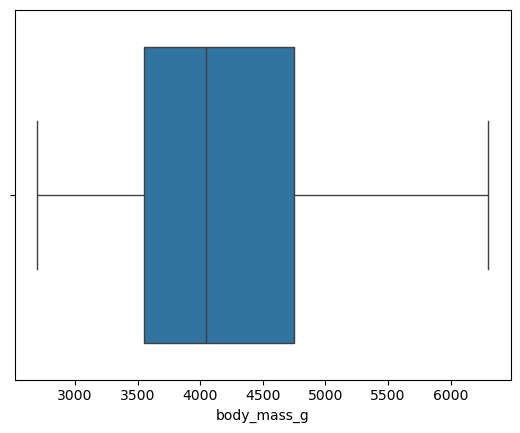

In [58]:
# Los mismos datos del histograma anterior, los representamos en un BoxPlot
sns.boxplot(penguins, x="body_mass_g")


<Axes: xlabel='species', ylabel='body_mass_g'>

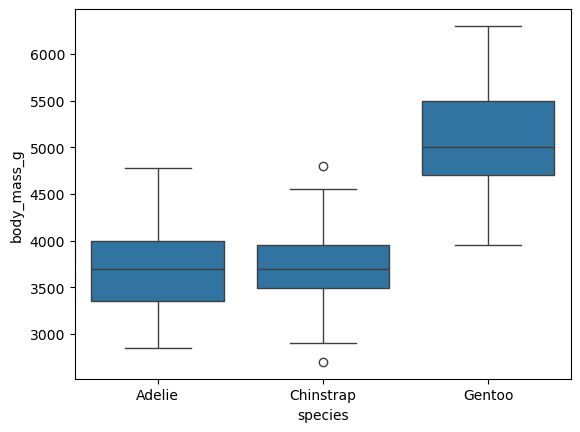

In [60]:
# Si queremos comparar distintos grupos de datos, podemos hacer boxplots para cada grupo
# Los mismos datos del histograma anterior, los representamos en un BoxPlot
sns.boxplot(data = penguins, x="species", y = "body_mass_g")


**Ejercicio.** ¿Qué conclusiones podemos sacar en base a este gráfico?